<a href="https://colab.research.google.com/github/GraceOby/Hamoye/blob/main/game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**GAME OF THRONES**

We'd be using three datasets:

* battles.csv

* character-death.csv

* character-predictions.csv 

In [41]:
battles_df = pd.read_csv("/content/drive/MyDrive/HAMOYE-Internship/project/datasets/battles.csv")
battles_df.tail()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
33,Second Seige of Storm's End,300,34,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,0.0,0.0,NaN,200.0,"Mace Tyrell, Mathis Rowan",Gilbert Farring,0.0,Storm's End,The Stormlands,NaN
34,Siege of Dragonstone,300,35,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,0.0,0.0,2000.0,NaN,"Loras Tyrell, Raxter Redwyne",Rolland Storm,0.0,Dragonstone,The Stormlands,NaN
35,Siege of Riverrun,300,36,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Frey,NaN,NaN,Tully,...,0.0,0.0,3000.0,NaN,"Daven Lannister, Ryman Fey, Jaime Lannister",Brynden Tully,0.0,Riverrun,The Riverlands,NaN
36,Siege of Raventree,300,37,Joffrey/Tommen Baratheon,Robb Stark,Bracken,Lannister,NaN,NaN,Blackwood,...,0.0,1.0,1500.0,NaN,"Jonos Bracken, Jaime Lannister",Tytos Blackwood,0.0,Raventree,The Riverlands,NaN
37,Siege of Winterfell,300,38,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Karstark,Mormont,Glover,Bolton,...,NaN,NaN,5000.0,8000.0,Stannis Baratheon,Roose Bolton,0.0,Winterfell,The North,NaN


In [42]:
char_death_df = pd.read_csv("/content/drive/MyDrive/HAMOYE-Internship/project/datasets/character-deaths.csv")
char_death_df.tail()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0
916,Talbert Serry,Tyrell,300.0,4.0,29.0,29.0,1,1,0,0,0,1,0


In [43]:
char_pred_df = pd.read_csv("/content/drive/MyDrive/HAMOYE-Internship/project/datasets/character-predictions.csv")
char_pred_df.tail()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1
1945,1946,0,0,0.093,0.907,Tytos Lannister,Casterly Rock,1,NaN,220.0,...,NaN,1.0,1,1,47.0,4,1,0,0.210702,0


**EDA on Battles Dataset**

We try to answer certain questions using the battles dataset,

This dataset contains the following features:

['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note']

In [44]:
battles_df.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [45]:
battles_df["name"].value_counts().sum()

38

In [46]:
battles_df["year"].min(), battles_df["year"].max()

(298, 300)

* There were 38 battles fought within the 3-year context of our data...

* Which of these years had the most battles? 

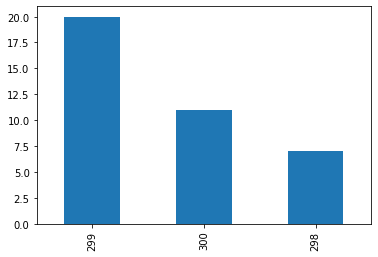

In [47]:
battles_df["year"].value_counts().plot(kind="bar")

Most battles occured in 299BC

In [48]:
battles_df.isna().sum()

name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
attacker_2            28
attacker_3            35
attacker_4            36
defender_1             1
defender_2            36
defender_3            38
defender_4            38
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
note                  33
dtype: int64

To see the counts of values in different columns...

In [49]:
battles_df["region"].value_counts()

The Riverlands     17
The North          10
The Westerlands     3
The Stormlands      3
The Crownlands      2
The Reach           2
Beyond the Wall     1
Name: region, dtype: int64

In [50]:
battles_df["attacker_king"].value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

In [51]:
battles_df["attacker_commander"].value_counts()

Gregor Clegane                                                                                     4
Theon Greyjoy                                                                                      2
Robb Stark, Brynden Tully                                                                          2
Euron Greyjoy, Victarion Greyjoy                                                                   2
Rorge                                                                                              1
Walder Frey, Roose Bolton, Walder Rivers                                                           1
Walder Frey                                                                                        1
Mance Rayder, Tormund Giantsbane, Harma Dogshead, Magnar Styr, Varamyr                             1
Ramsey Bolton                                                                                      1
Jaime Lannister                                                                            

In [52]:
battles_df["defender_king"].value_counts()

Robb Stark                  14
Joffrey/Tommen Baratheon    13
Balon/Euron Greyjoy          4
Stannis Baratheon            2
Renly Baratheon              1
Mance Rayder                 1
Name: defender_king, dtype: int64

In [53]:
battles_df["defender_commander"].value_counts()

Clement Piper, Vance                                                                                             1
Beric Dondarrion                                                                                                 1
Tytos Blackwood                                                                                                  1
Brynden Tully                                                                                                    1
Rolland Storm                                                                                                    1
Gilbert Farring                                                                                                  1
Asha Greyjoy                                                                                                     1
Stannis Baratheon, Jon Snow, Donal Noye, Cotter Pyke                                                             1
Jason Mallister                                                                 

What Questions can we ask from all the above columns?

In [54]:
#Major deaths/capture by region
deaths_per_region = battles_df.groupby("region").sum()[["major_death", "major_capture"]].sort_values(by="major_death", ascending=False)
deaths_per_region

,major_death,major_capture
region,,
The Riverlands,6.0,6.0
The Crownlands,2.0,1.0
The Westerlands,2.0,1.0
Beyond the Wall,1.0,1.0
The North,1.0,2.0
The Stormlands,1.0,0.0
The Reach,0.0,0.0


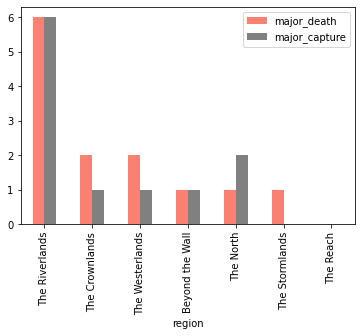

In [55]:
deaths_per_region.plot.bar(color = ["salmon", "grey"], rot = 90)

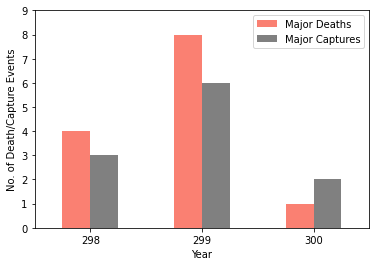

In [56]:
#Major deaths/Capture by year
deaths_per_year = battles_df.groupby('year').sum()[["major_death", "major_capture"]].plot.bar(rot = 0, color=["salmon", "grey"])
deaths_per_year.set(xlabel = "Year", ylabel = "No. of Death/Capture Events", ylim = (0, 9)), 
deaths_per_year.legend(["Major Deaths", "Major Captures"])

We define new columns:


1.   attacker_kings_count: no of kings on the attacking side
2.   defender_kings_count: no of Kings defending
3.   attacking_commanders_count: no of commanders attacking



In [57]:
battles_df["attacker_kings_count"] = (4-battles_df[["attacker_1", "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis=1))
battles_df["attacker_kings_count"][:10]

0    1
1    1
2    1
3    1
4    2
5    2
6    1
7    1
8    1
9    1
Name: attacker_kings_count, dtype: int64

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'No. of Major Attacker Houses')]

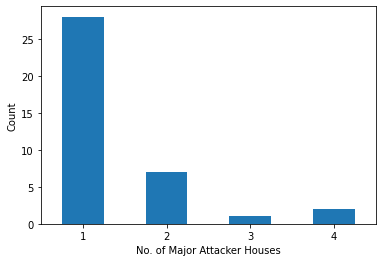

In [58]:
#To visualize the above i.e how often more than one king attacked
b = battles_df["attacker_kings_count"].value_counts().sort_index().plot.bar(rot = 0)
b.set(xlabel = "No. of Major Attacker Houses", ylabel = "Count")

In [59]:
battles_df["defender_kings_count"] = (4-battles_df[["defender_1", "defender_2", "defender_3", "defender_4"]].isnull().sum(axis=1))
battles_df["defender_kings_count"][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: defender_kings_count, dtype: int64

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'No. of Major Defender Houses')]

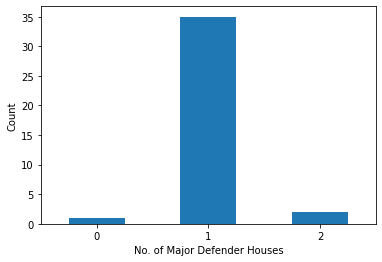

In [60]:
#To visualize the above i.e how often more than one king defended
b = battles_df["defender_kings_count"].value_counts().sort_index().plot.bar(rot = 0)
b.set(xlabel = "No. of Major Defender Houses", ylabel = "Count")

In [61]:
battles_df["attacking_commanders_count"] = [len(x) if type(x) == list else np.nan for x in battles_df.attacker_commander.str.split(",")]
battles_df["attacking_commanders_count"][:10]

0    1.0
1    1.0
2    2.0
3    5.0
4    2.0
5    3.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: attacking_commanders_count, dtype: float64

In [62]:
battles_df["attacker_outcome"].value_counts()

win     32
loss     5
Name: attacker_outcome, dtype: int64

In [63]:
a = battles_df.groupby("attacker_king").sum()[["attacking_commanders_count"]].sort_values(by="attacking_commanders_count", ascending=False)
a

,attacking_commanders_count
attacker_king,
Joffrey/Tommen Baratheon,28.0
Robb Stark,24.0
Stannis Baratheon,16.0
Balon/Euron Greyjoy,9.0


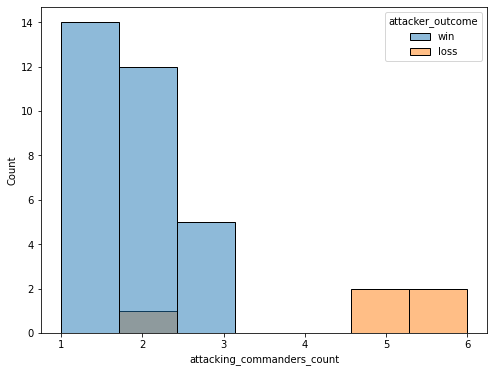

In [64]:
plt.subplots(figsize=(8,6))
sns.histplot(data=battles_df, x=battles_df["attacking_commanders_count"], hue="attacker_outcome")
plt.show()

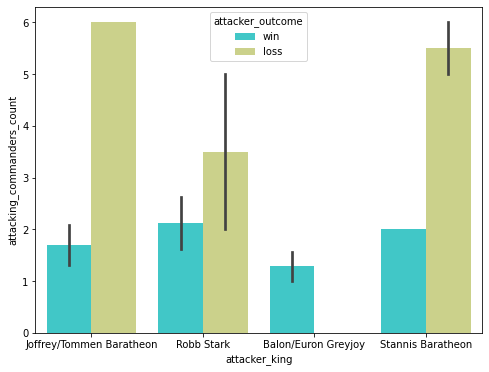

In [65]:
plt.subplots(figsize=(8, 6))
sns.barplot(x="attacker_king", y="attacking_commanders_count", hue="attacker_outcome", data=battles_df, palette="rainbow")
plt.show()

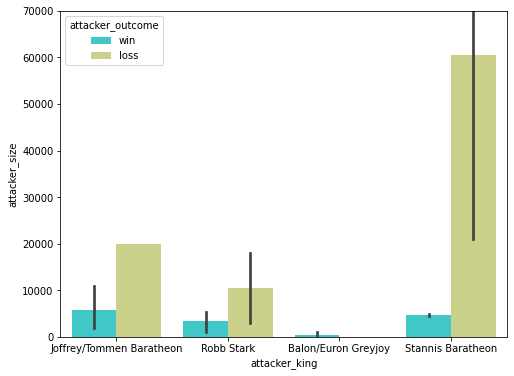

In [66]:
plt.subplots(figsize=(8, 6))
sns.barplot(x="attacker_king", y="attacker_size", hue="attacker_outcome", data=battles_df, palette="rainbow")
plt.ylim(0, 70000)
plt.show()

In [67]:
battles_df.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note', 'attacker_kings_count',
       'defender_kings_count', 'attacking_commanders_count'],
      dtype='object')

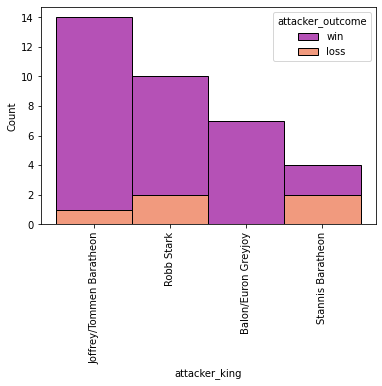

In [68]:
#Which King attacked the most and how succesful was he
sns.histplot(battles_df, x="attacker_king", hue="attacker_outcome", multiple="stack", palette="plasma" )
plt.xticks(rotation=90)
plt.show()

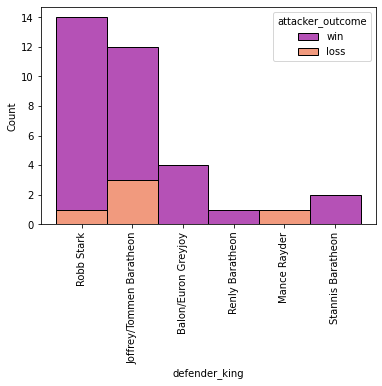

In [69]:
#Which King was most attacked? 
sns.histplot(data=battles_df, x="defender_king", hue="attacker_outcome", multiple="stack", palette="plasma" )
plt.xticks(rotation=90)
#plt.legend(["loss","win"])
plt.show()

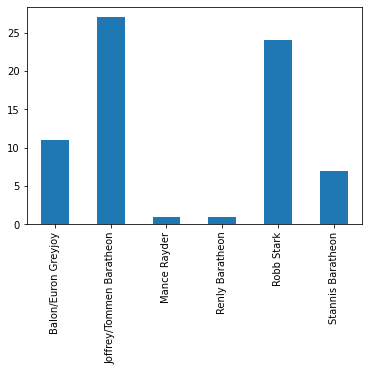

In [70]:
war_action = battles_df['attacker_king'].value_counts() + battles_df['defender_king'].value_counts()
war_action.fillna(1).plot(kind='bar')

In [71]:

c = battles_df.groupby(["attacker_king", "attacker_commander"]).sum()[["attacking_commanders_count"]]
c

attacking_commanders_count
attacker_king            attacker_commander                                                            
Balon/Euron Greyjoy      Asha Greyjoy                                                               1.0
                         Dagmer Cleftjaw                                                            1.0
                         Euron Greyjoy, Victarion Greyjoy                                           4.0
                         Theon Greyjoy                                                              2.0
                         Victarion Greyjoy                                                          1.0
Joffrey/Tommen Baratheon Daven Lannister, Ryman Fey, Jaime Lannister                                3.0
                         Gregor Clegane                                                             4.0
                         Jaime Lannister                                                            1.0
                         Jaime Lannister, Andros Brax                                               2.0
                         Jonos Bracken, Jaime Lannister                                             2.0
                         Loras Tyrell, Raxter Redwyne                                               2.0
                         Mace Tyrell, Mathis Rowan                                                  2.0
                         Ramsay Snow, Theon Greyjoy                                                 2.0
                         Ramsey Bolton                                                              1.0
                         Tywin Lannister, Flement Brax, Gregor Clegane, ...                         6.0
                         Walder Frey, Roose Bolton, Walder Rivers                                   3.0
Robb Stark               Helman Tallhart                                                            1.0
                         Robb Stark, Brynden Tully                                                  4.0
                         Robb Stark, Smalljon Umber, Black Walder Frey                              3.0
                         Robb Stark, Tytos Blackwood, Brynden Tully                                 3.0
                         Robertt Glover, Helman Tallhart                                            2.0
                         Rodrik Cassel, Cley Cerwyn                                                 2.0
                         Roose Bolton, Vargo Hoat, Robett Glover                                    3.0
                         Roose Bolton, Wylis Manderly, Medger Cerwyn, Ha...                         5.0
                         Walder Frey                                                                1.0
Stannis Baratheon        Mance Rayder, Tormund Giantsbane, Harma Dogshea...                         5.0
                         Stannis Baratheon                                                          1.0
                         Stannis Baratheon, Alysane Mormot                                          2.0
                         Stannis Baratheon, Davos Seaworth                                          2.0
                         Stannis Baratheon, Imry Florent, Guyard Morrige...                         6.0